In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [93]:
def avg_metric(df: pd.DataFrame, metric_name: str):
    all_data = None
    nb_point = 0
    for metric in df.columns[1:]:
        if metric_name in metric:
            nb_point += 1
            if all_data is None:
                all_data = df[metric].copy()
            else:
                all_data += df[metric]
    return all_data/nb_point
def generate_metric_charts(csv_file):
    all_data = []
    if not os.path.exists(csv_file):
        raise ValueError(f'{csv_file} does not exist')
    df = pd.read_csv(csv_file)
    key = "PACKAGE_ENERGY (W)"
    if "CPU_ENERGY (J)" in df.columns:
        key = "CPU_ENERGY (J)"
    if "PACKAGE_ENERGY (J)" in df.columns:
        key = "PACKAGE_ENERGY (J)"
    if "SYSTEM_POWER (Watts)" in df.columns:
        key = "SYSTEM_POWER (Watts)"
    data = df[key].copy().to_list()
    if key != "CPU_POWER (Watts)" and key != "SYSTEM_POWER (Watts)":
        df[key + "_original"] = df[key].copy()
        for i in range(0, len(data)):
            if i in df[key + "_original"] and i - 1 in df[key + "_original"]:
                # diff with previous value and convert to watts
                data[i] = (data[i] - df[key + "_original"][i - 1]) * (1000 / df["Delta"][i])
            else:
                data[i] = 0
    # data = data[1:-1]
    for i in range(0, len(data)):
        all_data.append({"Time": i, "CPU_POWER (Watts)": data[i]})
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(data, label="CPU Power")
    ax.set_ylabel('watts')

    ax2 = ax.twinx()
    
    ax2.plot(avg_metric(df, "CPU_TEMP"), label="CPU TEMP (C)", color="red")
    ax2.plot(avg_metric(df, "CPU_USAGE"), label="CPU USAGE (%)", color="orange")
    ax2.plot(df["USED_MEMORY"]*100/df["TOTAL_MEMORY"], label="Used Memory (%)", color="green")
    ax2.set_ylim([0, 100])
    
    ax.set(xlabel=None)
    fig.legend(loc='upper right')
    fig.tight_layout()
    plt.show()

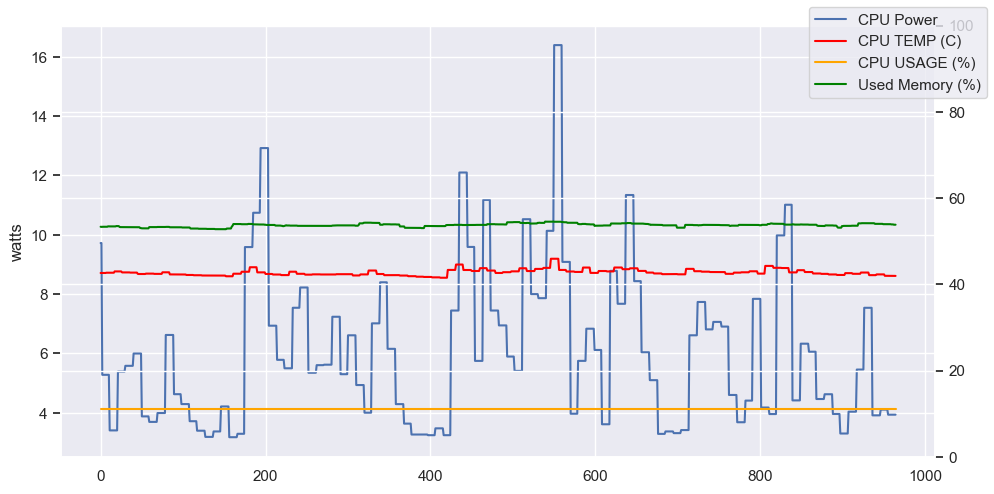

In [94]:
generate_metric_charts(os.path.join(os.getcwd(), 'usage.csv'))